In [42]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn import svm
sns.set_context('notebook')
sns.set_style('white')

In [43]:
df = loadmat('ex6data1.mat')


In [44]:
X = df['X']
y = df['y']

In [45]:
print(X[:5])

[[1.9643 4.5957]
 [2.2753 3.8589]
 [2.9781 4.5651]
 [2.932  3.5519]
 [3.5772 2.856 ]]


In [46]:
print(y[:5])

[[1]
 [1]
 [1]
 [1]
 [1]]


In [53]:
def plot_data(X, y, point_size):
    pos = (y==1).ravel()
    neg = (y==0).ravel()
    plt.scatter(X[pos, 0], X[pos, 1], s=point_size, c='b', marker='P')
    plt.scatter(X[neg, 0], X[neg, 1], s=point_size, c='r', marker='x')

<Figure size 576x576 with 0 Axes>

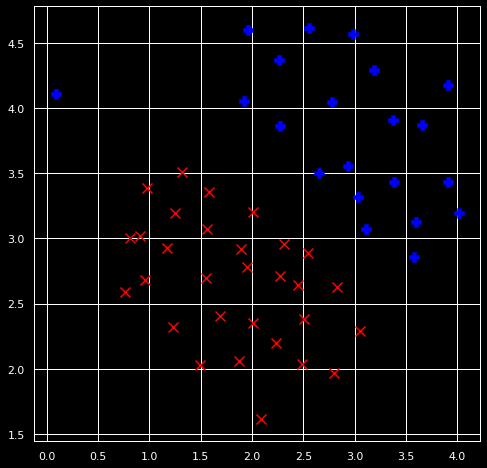

In [60]:
plt.figure(figsize=(8,8))
plt.style.use(['ggplot', 'dark_background'])
plot_data(X, y, 100)

In [62]:
sv = svm.SVC(kernel='linear', C=1)

In [63]:
sv.fit(X,y.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [77]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plot_data(X, y,50)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='y', marker='|', s=100, linewidths='5')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)


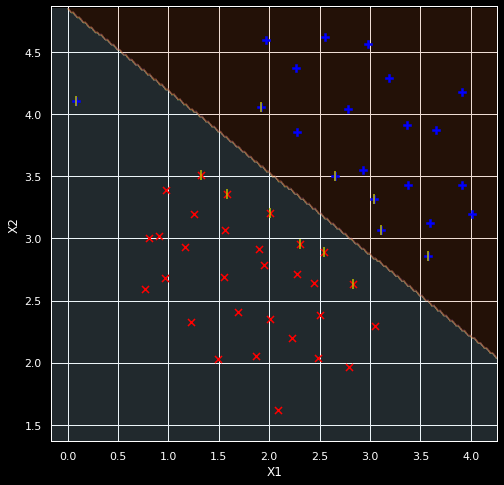

Number of support vectors:  12


In [78]:
plt.figure(figsize=(8,8))

plot_svc(sv,X,y)